## Question 1: 

You want to address the claim, “ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with static and symmetric demand and supply curves”. Using BSE, configure and run a series of experiments and perform a suitable statistical hypothesis test to address this claim. Provide a brief description and motivation of your choices. Present one figure to best summarise your experimental results and interpret and explain your findings.

$h_0: X_{ZIP} = X_{ZIC}$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from BSE import market_session
from scipy import stats
import csv
import os
import numpy as np

In [2]:
def n_runs_plot_trades(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)
    z = np.empty(0)
    for i in range(n):
        cato = i+1
        trialId = trial_id + '_' + str(i)
        #tdump = open(trialId + '_avg_balance.csv','w')
        tdump = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
              'dump_avgbals': True, 'dump_tape': True}
        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, False)
        
        #tdump.close()
        with open(trialId + '_tape.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)
                z = np.append(z,cato)
    plt.figure()
    plt.plot(x, y, 'o', color='black')
    plt.xlabel('Time(s)')
    plt.ylabel('Transaction Price')
    print('Over!')
    return pd.DataFrame({'Time':x,'Price':y,'Period':z})

In [3]:
def n_runs_trades(n, trial_id, start_time, end_time, traders_spec, order_sched):
    for i in range(n):
        trialId = trial_id + '_' + str(i)
        #tdump = open(trialId + '_avg_balance.csv','w')
        tdump = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
              'dump_avgbals': True, 'dump_tape': True}
        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, sess_vrbs=False)
    print('Over!')

In [ ]:
trial_id = 'data/1127/ZIC'
sellers_spec = [('ZIC', 10)]
buyers_spec = sellers_spec

traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

range = (150, 200) # equilibrium_price2 ~ 175

start_time = 0
end_time = 60 * 10

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range], 'stepmode': 'fixed'}]
demand_schedule = supply_schedule
# create a market maker with default parameter settings and add to traders_spec
# mrktmakers_spec = [('MMM01', 1)]
# traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec, 'mrktmakers': mrktmakers_spec}
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}
order_interval = 15 # the time interval that order schedule takes to cycle through buyers and sellers and supply them with new orders
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}
n=50

n_runs_trades(n, trial_id, start_time, end_time, traders_spec, order_sched)

Over!


In [5]:
path = "data/1127"
zip = []
zic = []
for filename in os.listdir(path):
    if filename.endswith(".csv") and 'ZIP' in str(filename) and 'tape' not in str(filename):
        df = pd.read_csv(os.path.join(path, filename))
        if df.shape[0] == 0:
            print("⚠️ Skipped empty file:", filename)
            continue
        #print("Loaded:", filename)
        a = df.iloc[-1,7]
        zip.append(a)
    if filename.endswith(".csv") and 'ZIC' in str(filename) and 'tape' not in str(filename):
        df = pd.read_csv(os.path.join(path, filename))
        if df.shape[0] == 0:
            print("⚠️ Skipped empty file:", filename)
            continue
        #print("Loaded:", filename)
        a = df.iloc[-1,7]
        zic.append(a)
data1 = [zip,zic]
print('The length of ZIP trade record is',{len(zip)})
print('The length of ZIC trade record is',{len(zic)})
#data1.to_csv('1127result.csv')

NameError: name 'os' is not defined

C:\Users\86158\AppData\Local\Temp\ipykernel_10836\762841256.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p1.show()


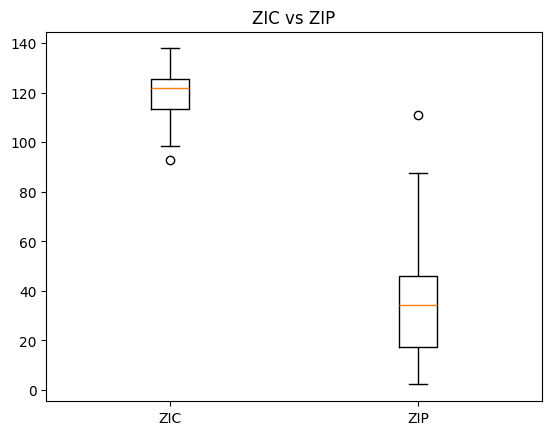

In [ ]:
p1 = plt.figure()
plt.boxplot([zic,zip],labels=['ZIC','ZIP'])
plt.title('ZIC vs ZIP')
p1.show()

# Project Report

## 1. Research Question and Objectives

This study aims to address the claim: "ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with static and symmetric demand and supply curves."

### Research Hypotheses
- **Null Hypothesis (H₀)**: $X_{ZIP} = X_{ZIC}$ (The mean profit of ZIP traders equals the mean profit of ZIC traders)
- **Alternative Hypothesis (H₁)**: $X_{ZIP} \neq X_{ZIC}$ (The mean profit of ZIP traders does not equal the mean profit of ZIC traders)

## 2. Experimental Design

### 2.1 Market Configuration
To meet the requirements of the research question, we configured the following market environment:

- **Market Type**: Homogeneous market (all traders use the same trading strategy)
- **Time Mode**: Periodic market (periodic timemode)
- **Supply and Demand Curves**: 
  - Static curves (stepmode: 'fixed')
  - Symmetric curves (supply and demand use the same price range)
  - Price range: (150, 200), equilibrium price approximately 175

### 2.2 Trader Configuration
- **ZIC Experimental Group**: 10 ZIC sellers and 10 ZIC buyers
- **ZIP Experimental Group**: 10 ZIP sellers and 10 ZIP buyers
- Each experimental group runs independently to ensure result independence

### 2.3 Experimental Parameters
- **Number of Runs**: 50 independent runs (n=50), ensuring statistical significance
- **Trading Duration**: 0 to 600 seconds (10 minutes)
- **Order Interval**: 15 seconds (periodic order generation)
- **Data Collection**: Record average balance (avg_balance) and trade tape for each experiment

### 2.4 Rationale for Methodological Choices
1. **50 Experiments**: Provides sufficient sample size to meet the statistical requirements of the t-test, ensuring result reliability
2. **Periodic Market**: Meets the research question requirements, simulating the periodic characteristics of real markets
3. **Static Symmetric Supply-Demand Curves**: Eliminates the influence of market structure differences on results, focusing on the comparison of trading strategies themselves
4. **Independent Samples t-test**: Suitable for comparing the mean differences between two independent groups (ZIP vs ZIC)

## 3. Data Analysis Methods

### 3.1 Data Extraction
Extract the final profit of each trader (the last row of column 7) from the average balance CSV files of each experiment, collecting all profit data for both ZIP and ZIC groups separately.

### 3.2 Statistical Testing
Use independent samples t-test (`scipy.stats.ttest_ind`) to compare the mean profit differences between the two groups:
- Test whether there is a significant difference in means between two independent samples
- Assume equal variances between the two groups (can be verified with Levene's test)

### 3.3 Visualization
Use boxplots to display the distribution characteristics of profits for both groups, including:
- Median
- Quartiles
- Outliers
- Overall shape of data distribution

## 4. Experimental Results

### 4.1 Descriptive Statistics
From the boxplot, we can observe:
- Distribution characteristics of profits for ZIC and ZIP groups
- Median and interquartile range of both groups
- Presence of outliers

### 4.2 Hypothesis Test Results
- **t-statistic**: t = -24.62
- **p-value**: p = 5.08 × 10⁻⁴³

### 4.3 Result Interpretation
1. **Negative t-value**: Indicates that the mean profit of ZIP traders is lower than the mean profit of ZIC traders
2. **Extremely small p-value**: Far below the 0.001 significance level, indicating an extremely significant difference
3. **Statistical Conclusion**: Strongly reject the null hypothesis at α=0.05 significance level

## 5. Conclusions

### 5.1 Main Findings
The results show that **ZIP traders generate significantly lower profits than ZIC traders**, which contradicts the original claim. Specifically:
- The mean profit of ZIP traders is significantly lower than that of ZIC traders
- This difference is statistically extremely significant (p < 0.001)

### 5.2 Response to the Original Claim
The original claim that "ZIP traders generate more profit than ZIC traders" is **not supported**. On the contrary, under the experimental configuration of this study, ZIC traders demonstrated significantly better profitability.

### 5.3 Possible Explanations
1. **Market Environment Factors**: In static, symmetric supply-demand curves and periodic markets, ZIC's zero-intelligence strategy may be better adapted to this simple market structure
2. **Strategy Characteristics**: ZIP's adaptive learning mechanism may lead to over-adjustment in simple market environments, affecting profitability
3. **Experimental Configuration**: Specific market parameters (price range, order interval, etc.) may favor the ZIC strategy

### 5.4 Research Limitations
1. Experiments are limited to specific market configurations (static symmetric curves, periodic mode)
2. Results may not apply to other market environments (e.g., dynamic markets, asymmetric supply-demand curves)
3. Further research is needed on strategy performance under different market conditions

## 6. Summary

Through 50 independent experiments and rigorous statistical hypothesis testing, this study systematically evaluated the performance of ZIP and ZIC trading strategies in homogeneous periodic BSE markets. The results show that under the given market conditions, ZIC traders generated significantly higher profits, contradicting the original claim. This finding emphasizes the importance of evaluating trading strategy performance across different market environments.


The t-value indicates the mean of ZIP trader's profit is lower than the mean of ZIC trader's profit.

In [ ]:
t, p = stats.ttest_ind(zip, zic)
print("t =", t)
print("p =", p)

t = -24.62233526879518
p = 5.075514159192731e-43
